### 1-  getting datas by "GetData"
#### i have imported my datas from the DataBase from  seperate python file with the name "GetData"
#### and i have imported it into this file as you can see below

In [86]:
import GetData as d
import pandas as pd 
import matplotlib.pyplot as plt 


### 2- analyzing tables by pandas and knowing some informations
#### knowing the datatypes 
#### if there is any null values 

In [23]:
def analyze_dataframe(df: pd.DataFrame, table_name: str):
    # Get the number of rows and columns
    num_rows, num_columns = df.shape
    
    # Get the number of null values in each column
    null_values = df.isnull().sum()
    data_types = df.dtypes
    
    # Build the result string
    result = f"Table {table_name} has {num_rows} rows and {num_columns} columns.\n"
    for column in df.columns:
        result += f'Column "{column}" has data type {data_types[column]} and {null_values[column]} null values.\n'
    
    # Print the result
    print(result)
    return result

In [24]:
analyze_dataframe(d.customer,'customer')
print("--------------------------------------------------")
analyze_dataframe(d.invoiceline,'invoiceline')
print("--------------------------------------------------")
analyze_dataframe(d.invoice,'invoice')
print("--------------------------------------------------")
analyze_dataframe(d.employee,'employee')
print("--------------------------------------------------")
analyze_dataframe(d.track,'track')
print("--------------------------------------------------")
analyze_dataframe(d.mediatype,'mediatype')
print("--------------------------------------------------")
analyze_dataframe(d.genre,'genre')
print("--------------------------------------------------")
analyze_dataframe(d.albums,'albums')
print("--------------------------------------------------")


Table customer has 59 rows and 13 columns.
Column "CustomerId" has data type int64 and 0 null values.
Column "FirstName" has data type object and 0 null values.
Column "LastName" has data type object and 0 null values.
Column "Company" has data type object and 49 null values.
Column "Address" has data type object and 0 null values.
Column "City" has data type object and 0 null values.
Column "State" has data type object and 29 null values.
Column "Country" has data type object and 0 null values.
Column "PostalCode" has data type object and 4 null values.
Column "Phone" has data type object and 1 null values.
Column "Fax" has data type object and 47 null values.
Column "Email" has data type object and 0 null values.
Column "SupportRepId" has data type int64 and 0 null values.

--------------------------------------------------
Table invoiceline has 2240 rows and 5 columns.
Column "InvoiceLineId" has data type int64 and 0 null values.
Column "InvoiceId" has data type int64 and 0 null val

In [22]:
# we have 1 null values in the employee table in the column "reportsTo" that seems to be very important
d.employee[d.employee['ReportsTo'].isnull()]
# no i fount out that he is a general manager now we have to see to who most of our general managers report 
d.employee[d.employee["Title"] =='General Manager']
# looks like Andrew is the only general manager we have and we do not know to whom he should report :/

,EmployeeId,LastName,FirstName,Title,ReportsTo,BirthDate,HireDate,Address,City,State,Country,PostalCode,Phone,Fax,Email
0,1,Adams,Andrew,General Manager,NaN,1962-02-18,2002-08-14,11120 Jasper Ave NW,Edmonton,AB,Canada,T5K 2N1,+1 (780) 428-9482,+1 (780) 428-3457,andrew@chinookcorp.com


#### there are some important things that we should consider 
##### the 5 countries that we had our most sale 
##### our top 5 genres 
##### what kind of music geners are most wanted in those 5 countries ???
 

,TotalSale
BillingCountry,
USA,91
Canada,56
Brazil,35
France,35
Germany,28


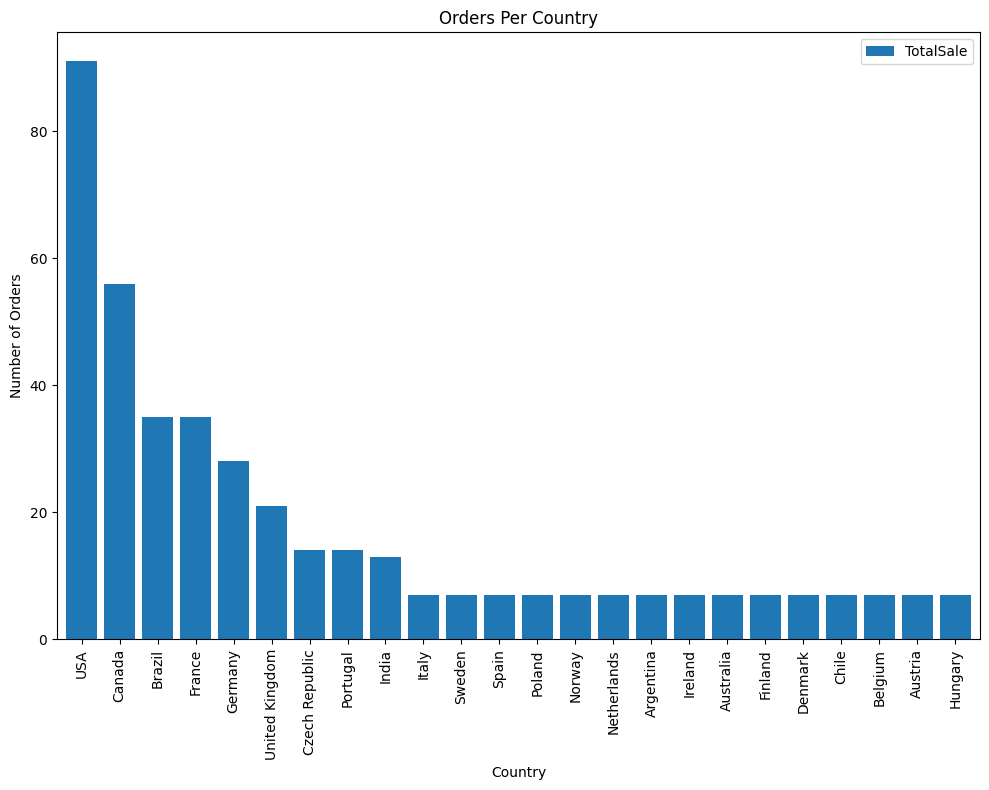

In [110]:
inv = d.invoice[['InvoiceId' , 'BillingCountry']]
invPerCountry = inv.groupby('BillingCountry').agg(TotalSale =('InvoiceId','count')).sort_values('TotalSale', ascending=False)
display(invPerCountry.head(5))

# Plotting with matplotlib
ax = invPerCountry.plot(kind='bar', width=0.8, figsize=(10, 8)) 
plt.title('Orders Per Country')
plt.xlabel('Country')
plt.ylabel('Number of Orders')
plt.xticks(rotation=90)
# Ensure the bars use the full width
plt.tight_layout()
plt.show()


In [103]:
# finding popular genres 




Track_genre =pd.merge(d.track[['TrackId' ,'GenreId']] , d.genre[['GenreId', 'Name']] , on='GenreId' )
Track_genre_invoiceline = pd.merge(Track_genre[['TrackId','Name']] , d.invoiceline[['TrackId','InvoiceLineId' , 'InvoiceId']] , on='TrackId')
Track_genre_invoiceline_invoice = pd.merge(Track_genre_invoiceline ,d.invoice[['InvoiceId', 'BillingCountry']] ,on='InvoiceId' )
FavTracksPerGenre =Track_genre_invoiceline.groupby('Name').agg(NumOfTracks_sold = ('InvoiceLineId','count')).sort_values(by='NumOfTracks_sold' ,ascending= False).head(5).reset_index()
FavTracksPerGenre

,Name,NumOfTracks_sold
0,Rock,835
1,Latin,386
2,Metal,264
3,Alternative & Punk,244
4,Jazz,80


# پرفروش ترین ژانر ها در پرفروشترین کشورها 

In [109]:
top5Countries = invPerCountry['BillingCountry'].head(5).tolist()
top5genres = FavTracksPerGenre['Name'].tolist()

top5s=Track_genre_invoiceline_invoice[Track_genre_invoiceline_invoice['BillingCountry'].isin(top5Countries) & Track_genre_invoiceline_invoice['Name'].isin(top5genres)]
top5sGrouped = top5s.groupby(['BillingCountry','Name']).agg(numOfsales = ('InvoiceLineId' , 'count')).reset_index()
top5sGrouped

,BillingCountry,Name,numOfsales
0,Brazil,Alternative & Punk,7
1,Brazil,Latin,53
2,Brazil,Metal,15
3,Brazil,Rock,81
4,Canada,Alternative & Punk,36
5,Canada,Jazz,13
6,Canada,Latin,60
7,Canada,Metal,40
8,Canada,Rock,107
9,France,Alternative & Punk,31
